<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/pract_5BONUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


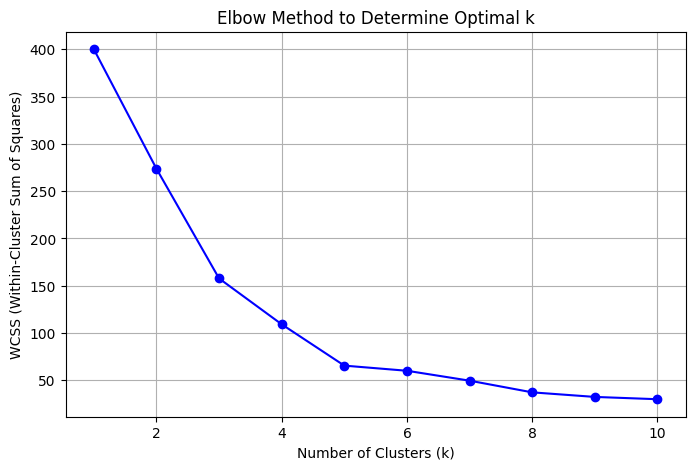

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# Load the dataset (assuming 'Mall_Customers.csv' is already loaded)
# dataset = pd.read_csv('Mall_Customers.csv')

# Assuming 'Annual Income (k$)' and 'Spending Score (1-100)' are the features for clustering
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Create and assign X_scaled

# Finding optimal k using the Elbow Method
wcss = []

for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)  # Now X_scaled is defined
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to cluster center

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.grid()
plt.show()

In [6]:
# Choose the optimal k based on Elbow Method
optimal_k = 4  # Adjust based on the elbow method plot

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
dataset["KMeans_Cluster"] = kmeans.fit_predict(X_scaled) # Replace df_filled with dataset

# Compute silhouette score for K-Means
silhouette_kmeans = silhouette_score(X_scaled, dataset["KMeans_Cluster"]) # Replace df_filled with dataset
print(f"\nSilhouette Score for K-Means (k={optimal_k}): {silhouette_kmeans:.2f}")


Silhouette Score for K-Means (k=4): 0.49


In [8]:
# Train DBSCAN model with sample hyperparameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters based on results
dataset["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled) # Replace df_filled with dataset

# Compute silhouette score for DBSCAN (ignoring noise points, i.e., cluster -1)
valid_clusters = dataset["DBSCAN_Cluster"] != -1 # Replace df_filled with dataset
if valid_clusters.sum() > 1:  # Ensure there are enough valid clusters
    silhouette_dbscan = silhouette_score(X_scaled[valid_clusters], dataset["DBSCAN_Cluster"][valid_clusters]) # Replace df_filled with dataset
    print(f"\nSilhouette Score for DBSCAN: {silhouette_dbscan:.2f}")
else:
    silhouette_dbscan = None
    print("\nDBSCAN did not form enough valid clusters for silhouette score calculation.")


Silhouette Score for DBSCAN: 0.39


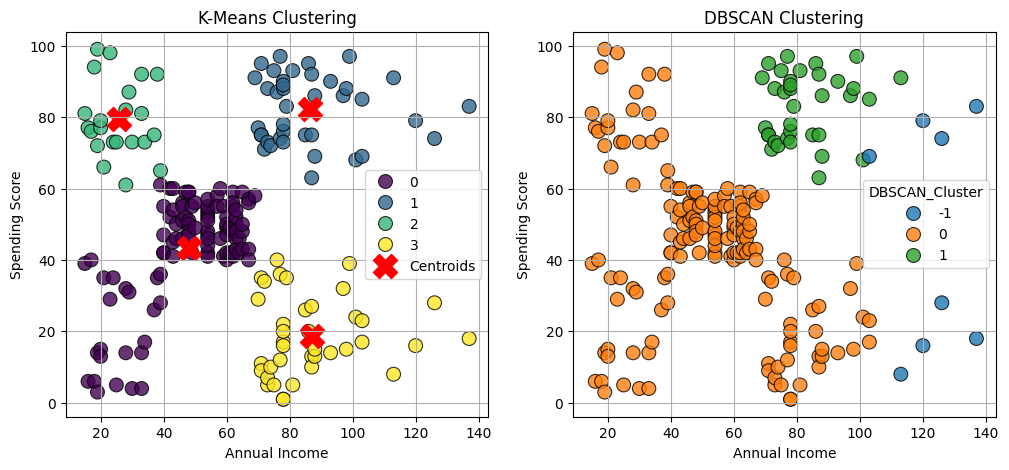

In [10]:
# K-Means Clustering Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x=dataset["Annual Income (k$)"],  # Replace df_filled with dataset
    y=dataset["Spending Score (1-100)"],  # Replace df_filled with dataset
    hue=dataset["KMeans_Cluster"],  # Replace df_filled with dataset
    palette="viridis",
    s=100,
    alpha=0.8,
    edgecolor="black"
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],  # Use column index 0 for 'Annual Income (k$)'
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],  # Use column index 1 for 'Spending Score (1-100)'
    c="red", marker="X", s=300, label="Centroids"
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("K-Means Clustering")
plt.legend()
plt.grid()

# DBSCAN Clustering Visualization
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=dataset["Annual Income (k$)"],  # Replace df_filled with dataset
    y=dataset["Spending Score (1-100)"],  # Replace df_filled with dataset
    hue=dataset["DBSCAN_Cluster"],  # Replace df_filled with dataset
    palette="tab10",
    s=100,
    alpha=0.8,
    edgecolor="black"
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("DBSCAN Clustering")
plt.grid()

plt.show()

In [11]:
# Compare the results
print("\nComparison of Clustering Methods:")
print(f"K-Means: Silhouette Score = {silhouette_kmeans:.2f}")
if silhouette_dbscan:
    print(f"DBSCAN: Silhouette Score = {silhouette_dbscan:.2f}")
else:
    print("DBSCAN: Could not compute Silhouette Score due to excessive noise points.")

# Recommendations
if silhouette_dbscan and silhouette_dbscan > silhouette_kmeans:
    print("\nDBSCAN may be better suited for this dataset as it identifies more natural clusters without assuming a fixed k.")
else:
    print("\nK-Means is likely the better choice for this dataset as it provides well-defined, balanced clusters.")



Comparison of Clustering Methods:
K-Means: Silhouette Score = 0.49
DBSCAN: Silhouette Score = 0.39

K-Means is likely the better choice for this dataset as it provides well-defined, balanced clusters.
